In [ ]:

import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
import seaborn as sns

from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras import models
import tensorflow as tf
import pickle

from PIL import Image
import cv2
import numpy as np


In [ ]:

train_folder = 'chest_xray/tain/'
test_folder = 'chest_xray/test'
val_folder = 'chest_xray/val'


In [ ]:
# DATA PREPROCESSING
# each folder has two sub folder name "PNEUMONIA", "NORMAL"
labels = ["NORMAL", "PNEUMONIA","COVID"]
IMG_SIZE = 50  # resize image


In [ ]:

def get_data_train(data_dir):
    data = []

    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if (count > 11500):
                  break
                print(os.path.join(path,img)) 
                # prinitng images in folder

                img_array = cv2.imread(os.path.join(
                    path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])   
                # labels and iamges are aded  to a datalist 
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
train = get_data_train(train_folder)


In [ ]:
test = get_data_train(test_folder)
val = get_data_train(val_folder)

X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []


In [ ]:
# classes = ["NORMAL", "PNEUMONIA", "COVID"]



# # classes = [0, 1, 2]
# label=[]

In [ ]:
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
    
    
    
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)             
                                                                                                                                                                                            #  What does reshape(- 1 mean?
                                                                                                                                                                                            #                    Image result for X_train.reshape(-1) meaning
                                                                                                                                                                                            #                    # It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria
                                                                                                                                                                                            #                    In NumPy, -1 in reshape(-1) refers to an unknown dimension that the reshape() function calculates for you. It is like saying: “I will leave this dimension for the reshape() function to determine”
                                                                                                                                                                                            # #                    A common use case is to flatten a nested array of an unknown number of elements to a 1D array.
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)


In [ ]:
X_train.size
# y_train.size

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=30,
    zoom_range=0.2,  # Randomly zoom image
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [ ]:

print("Train set:")
print("-"*60)
num_pneumonia = len(os.listdir(os.path.join(train_folder, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_folder, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_folder, 'COVID')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")
print(f"COVID={num_covid}")
print(f"Total Training={num_covid+num_normal+num_pneumonia}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_folder, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_folder, 'NORMAL')))}")
print(f"COVID={len(os.listdir(os.path.join(test_folder, 'COVID')))}")


print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_folder, 'PNEUMONIA')))}")
print(f"COVID={len(os.listdir(os.path.join(val_folder, 'COVID')))}")

print(f"NORMAL={len(os.listdir(os.path.join(val_folder, 'NORMAL')))}")
# pneumonia = os.listdir("./chest_xray/train/PNEUMONIA")
# pneumonia_dir = "./chest_xray/train/PNEUMONIA"


In [ ]:
# X_train.shape[1:]
X_train.size


In [ ]:
# CONVOLUTIONAL NEURAL NETWORK BASED MODEL
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))


# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.4))

# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.4))


# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(3))
# model.add(Activation("softmax"))


In [ ]:

# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="adam", metrics=["accuracy"])


In [ ]:
# history = model.fit(X_train, y_train, epochs=15,
#                     validation_data=(X_val, y_val), shuffle=True)
# history = model.fit(datagen.flow(X_train, y_train, batch_size=32),                                                                        number of sample pass from network at one time
#                     epochs=12,



#                     # //trained on x test and y test giving validation good
#                     validation_data=datagen.flow(X_val, y_val))


In [ ]:

# model.save("CPNPERFECT.h5")


In [ ]:
model.evaluate(X_train,y_train)

In [ ]:
model = keras.models.load_model("CPNcolabfulldata94.h5")


In [ ]:
# pickle.dump(model,open("CPNcolabfulldata94.pkl", "wb"))

In [ ]:
# y_pred = model.predict(X_test)

# img=y_pred[3000]
# print(labels[np.argmax(img)])

# print(img)






1/1 [==============================] - 0s 104ms/step
6


IndexError: invalid index to scalar variable.

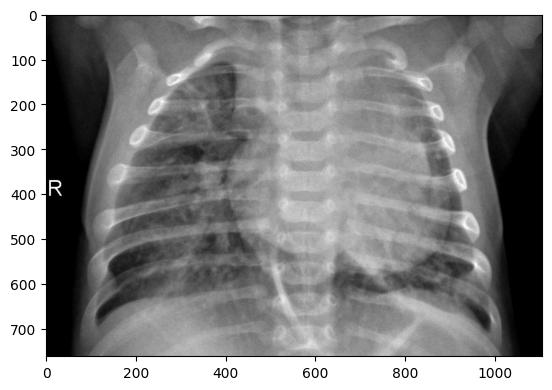

In [148]:




img = cv2.imread("./chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
plt.imshow(img)

img = cv2.resize(img, (50, 50))/255
img = img.reshape(-1, 50, 50, 1)

pred = model.predict(img)
# class_labels = ["NORMAL", "PNEUMONIA", "COVID"]
pred = np.argmax(pred)
print(pred)
print(class_labels[pred[0]])



In [140]:

x = image.img_to_array(img)

preds = model.predict(x)
# create a list containing the class labels
class_labels = ["NORMAL" ,"PNEUMONIA" ,"COVID"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])


ValueError: in user code:

    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 50, 50, 1), found shape=(None, 50, 3)


In [ ]:
predictions = [np.argmax(i) for i in y_pred]
np.unique(predictions)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,
                            predictions,
                            target_names=['Pneumonia (Class 0)', 'Normal (Class 1)', 'COVID (Class 2)']))


In [149]:
import numpy as np
import pandas as pd

cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, index=['0', '1', '2'], columns=['0', '1', '2'])
cm


,0,1,2
0,2341,54,51
1,7,383,0
2,176,16,2401


In [ ]:
sns.heatmap(cm, cmap="Blues", annot=True,
            xticklabels=labels, yticklabels=labels)
plt.show()



In [ ]:
# perfect
# 0	1472	8	65
# 1	45	615	2
# 2	103	16	1439

# cleardata

# 0	1486	9	50
# 1	45	614	3
# 2	139	14	1405

cpncolb94b
0	1469	10	66
1	25	636	1
2	101	8	1449

# largedata933
# 0	1490	9	46
# 1	45	615	2
# 2	122	11	1425


In [95]:

def predict_input_image(img):
  img_4d = img.reshape(-1, 50, 50, 1)
  prediction = model.predict(img_4d)[0]
  return {labels[i]: float(prediction[i]) for i in range(3)}


In [96]:
import gradio as gr

img = gradio.inputs.Image(shape=(50, 50))
label = gradio.outputs.Label(num_top_classes=3)


c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [97]:
# interface = gradio.Interface(fn=pneumoniaPrediction,
#                              title="Pneumonia Detection using Chest X-Ray",
#                              inputs=img,
#                              outputs=label,
#                              interpretation="default")
# interface.launch(debug=True, share=True)


gr.Interface(fn=predict_input_image,
             inputs=img, 
             outputs=label,
             interpretation='default').launch(debug='True')

IMPORTANT: You are using gradio version 3.10.1, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 289, in run_predict
    output = await app.blocks.process_api(
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 991, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 833, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "c:\Users\mc\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_back

Keyboard interruption in main thread... closing server.
